# Keras Functional API

In [6]:
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Model1: one input, two outputs

In [2]:
inp1 = layers.Input(shape=(784,), name='inp1')

l1 = layers.Dense(16, activation='relu', name='L1')(inp1)
l2 = layers.Dense(16, activation='relu', name='L2')(l1)
l3 = layers.Dense(16, activation='relu', name='L3')(l2)

out1 = layers.Dense(1, activation='sigmoid', name='out1')(l3)
out2 = layers.Dense(1, name='out2')(l3)

In [3]:
model1 = Model(inputs=inp1, outputs=[out1, out2])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp1 (InputLayer)              [(None, 784)]        0           []                               
                                                                                                  
 L1 (Dense)                     (None, 16)           12560       ['inp1[0][0]']                   
                                                                                                  
 L2 (Dense)                     (None, 16)           272         ['L1[0][0]']                     
                                                                                                  
 L3 (Dense)                     (None, 16)           272         ['L2[0][0]']                     
                                                                                              

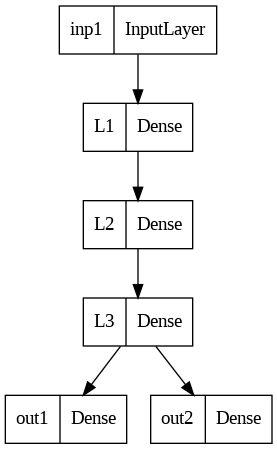

In [9]:
# plot_model(model1, 'model1.pdf')  #--> High resolution
plot_model(model1, 'model1.png')

## You can save the model and open it with [Netron app](https://netron.app/)

In [10]:
model1.save('model.h5')
model1.save('model.keras')

------

## Model2: two inputs, one output

In [11]:
inp1 = layers.Input(shape=(784,), name='inp1')
inp2 = layers.Input(shape=(100,), name='inp2')

c = layers.concatenate([inp1, inp2])
l1 = layers.Dense(16, activation='relu', name='L1')(c)
l2 = layers.Dense(16, activation='relu', name='L2')(l1)
l3 = layers.Dense(16, activation='relu', name='L3')(l2)

out1 = layers.Dense(1, activation='sigmoid', name='out1')(l3)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp1 (InputLayer)              [(None, 784)]        0           []                               
                                                                                                  
 inp2 (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 884)          0           ['inp1[0][0]',                   
                                                                  'inp2[0][0]']                   
                                                                                                  
 L1 (Dense)                     (None, 16)           14160       ['concatenate[0][0]']      

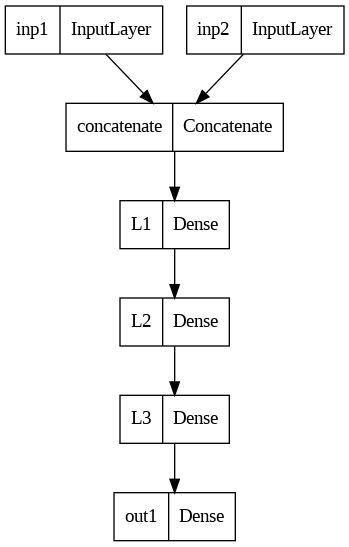

In [12]:
model2 = Model(inputs=[inp1, inp2], outputs=out1)
model2.summary()
plot_model(model2, 'model2.png')

------

## Model3: one input, one output, two paths

In [13]:
inp1 = layers.Input(shape=(784,), name='inp1')

l1 = layers.Dense(16, activation='relu', name='L1')(inp1)
l2 = layers.Dense(16, activation='relu', name='L2')(l1)
l3 = layers.Dense(16, activation='relu', name='L3')(l2)
l4 = layers.Dense(16, activation='relu', name='L4')(l1)
l5 = layers.Dense(16, activation='relu', name='L5')(l4)

c = layers.concatenate([l3, l5])
out1 = layers.Dense(1, activation='sigmoid', name='out1')(c)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp1 (InputLayer)              [(None, 784)]        0           []                               
                                                                                                  
 L1 (Dense)                     (None, 16)           12560       ['inp1[0][0]']                   
                                                                                                  
 L2 (Dense)                     (None, 16)           272         ['L1[0][0]']                     
                                                                                                  
 L4 (Dense)                     (None, 16)           272         ['L1[0][0]']                     
                                                                                            

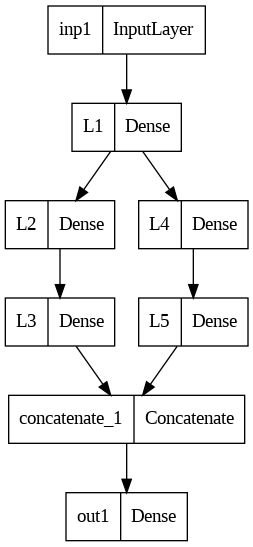

In [14]:
model3 = Model(inputs=inp1, outputs=out1)
model3.summary()
plot_model(model3, 'model3.png')